## Customer Segmentation Using K-means Clustering

### Importing Libraries

In [251]:
#Importing necessary Libraries
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import missingno as msno
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import warnings

warnings.filterwarnings("ignore")



### Loading and Inspecting the Data

In [253]:
#Loading the dataset
df = pd.read_csv('Mall_Customers.csv')

In [254]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [255]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Data Cleaning


In [258]:
#Renaming column name Genre to Gender
df.rename(columns={'Genre': 'Gender'}, inplace=True)

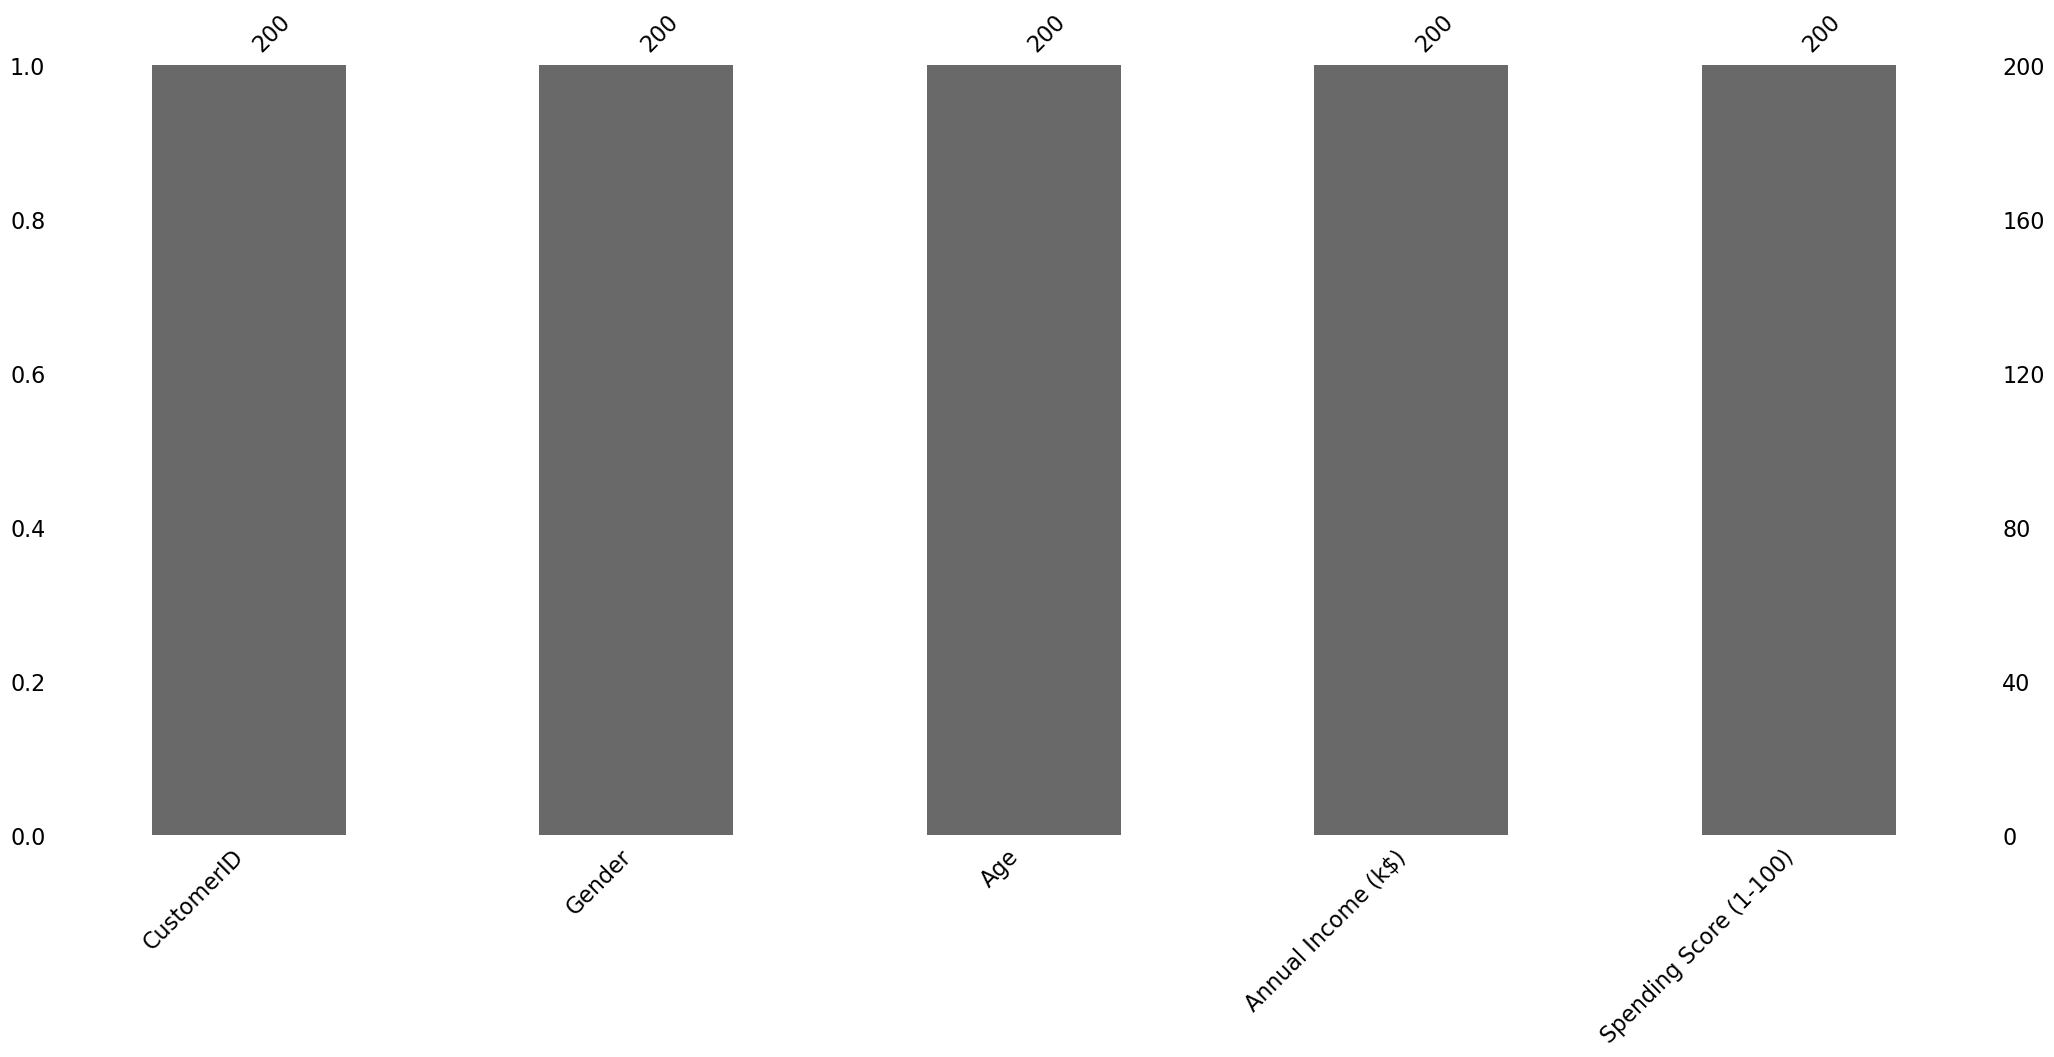

In [259]:
#checking any missing values
msno.bar(df)
plt.show()

In [260]:
#Dropping ID column
df.drop('CustomerID',axis = 1,inplace = True)

In [261]:
df = df.dropna()

### Exploratory Data Analysis

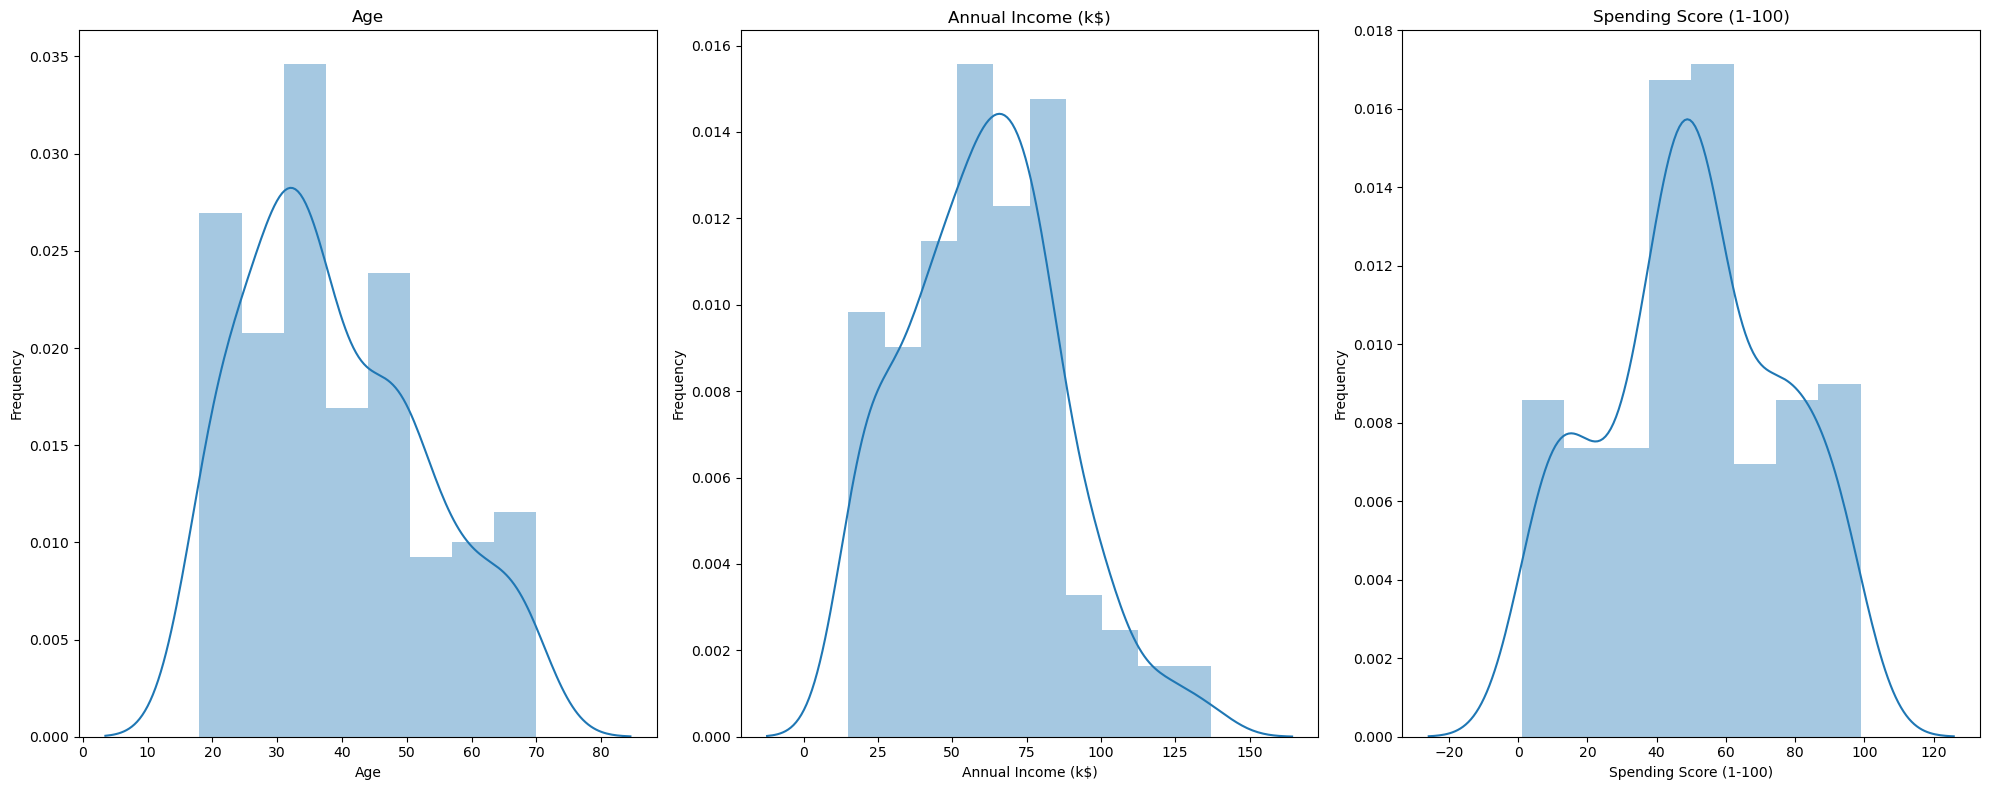

In [263]:
#Distribution plot
plt.figure(figsize=(20,8))

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i,col in enumerate(columns,1):
    plt.subplot(1,3,i)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.title(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


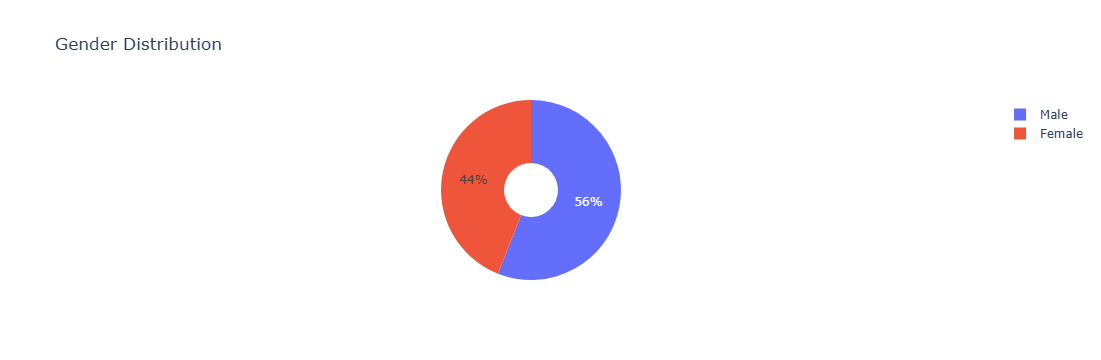

In [264]:
#Visualizing Gender Distribution
values = df['Gender'].value_counts()
labels = ['Male', 'Female']

fig = px.pie(values=values, names=labels,hole = 0.3,title = 'Gender Distribution')

fig.show()


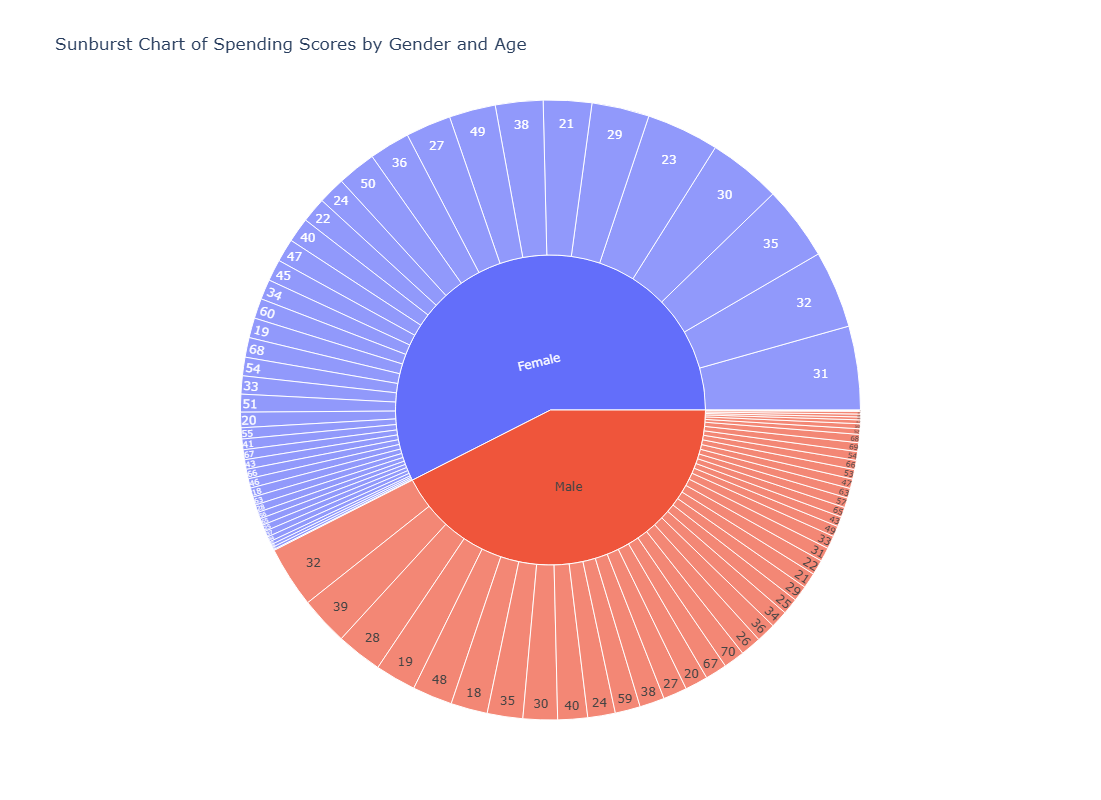

In [265]:
#Spending Scores by Gender and Age
fig = px.sunburst(
    df,
    path=['Gender', 'Age'],
    values='Spending Score (1-100)',
    title="Sunburst Chart of Spending Scores by Gender and Age"
)
fig.update_layout(width=1000, height=800)


# Show the chart
fig.show()

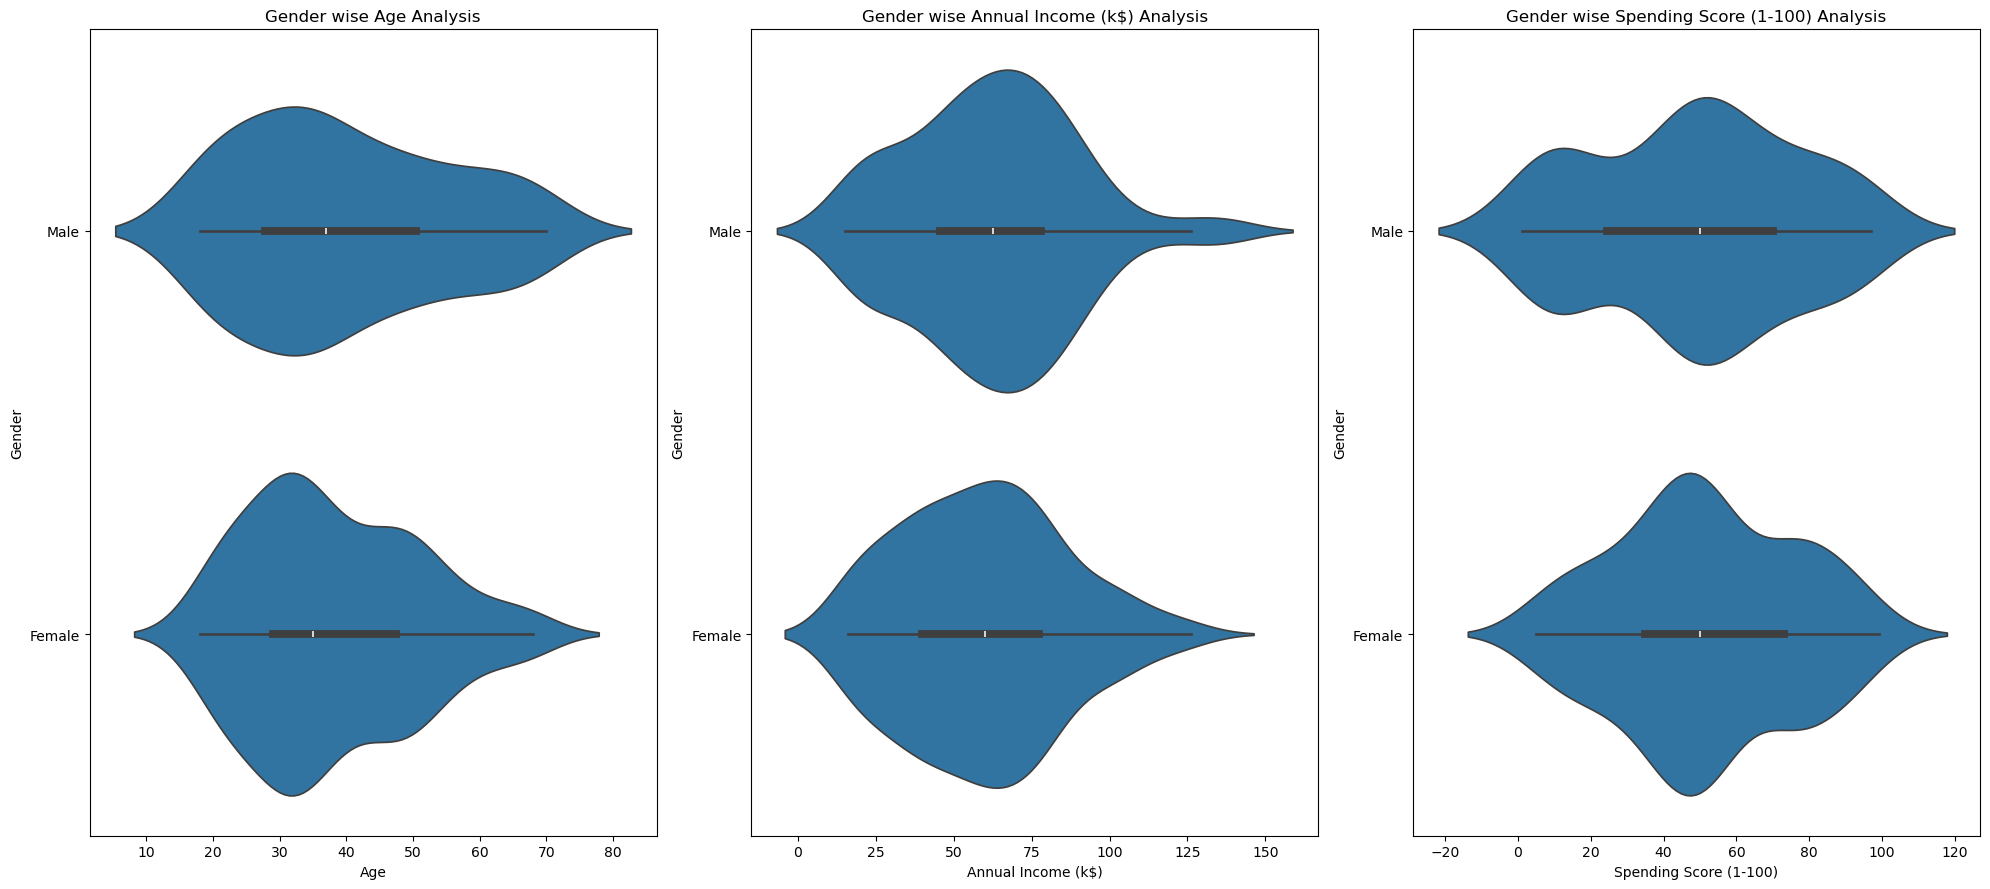

In [266]:
#Gender wise Analysis
plt.figure(figsize=(20, 9))
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i, col in enumerate(columns, start=1):
    plt.subplot(1, 3, i)
    sns.violinplot(x=col, y='Gender', data=df)
    plt.title(f'Gender wise {col} Analysis')

plt.tight_layout()
plt.show()


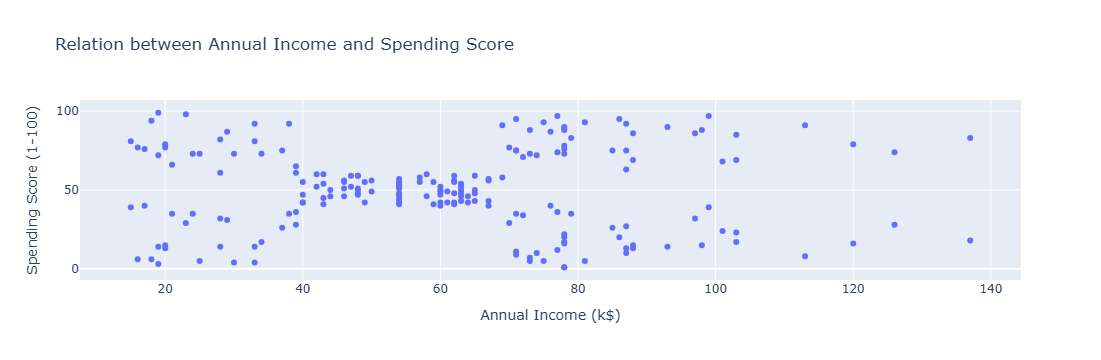

In [267]:
#Scatter plot
px.scatter(data_frame= df,x='Annual Income (k$)',y='Spending Score (1-100)',title = 'Relation between Annual Income and Spending Score')


<div align="center">
    <h2>K-Means Clustering</h2>
</div>


## Clustering on Age and Spending Score
This clustering helps to understand the relationship between the customer's age and their spending behavior.#

## Clustering on Annual Income and Spending Score
This clustering helps to segment customers based on their income levels and spending pattern#s.

## Clustering on Age, Annual Income, and Spending Score
This provides a more comprehensive clustering, taking into account the customer's age, income, and spending behavior simultaneously.


In [317]:
#Selecting the Features for clustering
clustering_Age_Spendingscore = df[['Age','Spending Score (1-100)']]
clustering_Annualincome_Spendingscore = df[['Annual Income (k$)','Spending Score (1-100)']]
clustering_All = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

#### Clustering on Age and Spending Score

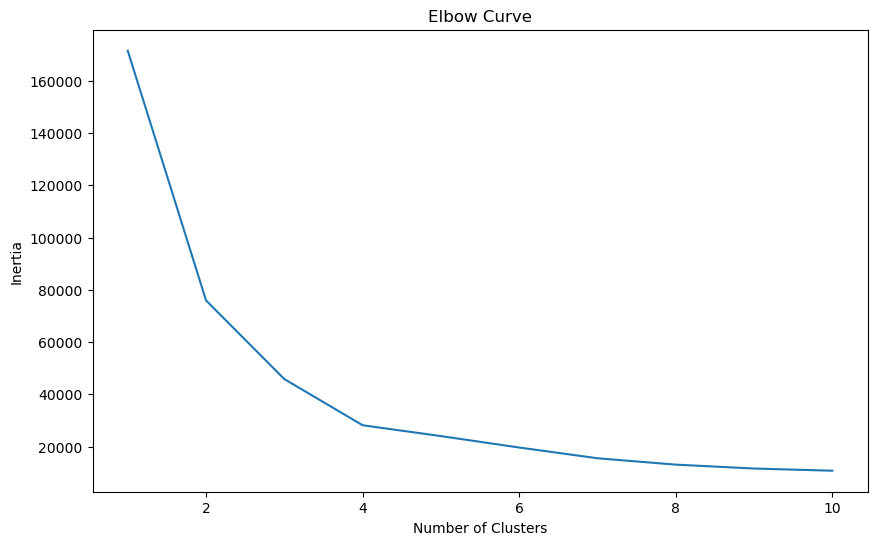

In [271]:
#Optimal Number of clusters using Elbow method
wcs_age_spending = []
for k in range(1,11):
    kmeans = KMeans(n_clusters= k,random_state= 0).fit(clustering_Age_Spendingscore)
    wcs_age_spending.append(kmeans.inertia_)

#Plotting elbow Curve
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcs_age_spending)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#### Clustering on Annual Income and Spending Score

Text(0.5, 1.0, 'Elbow Curve')

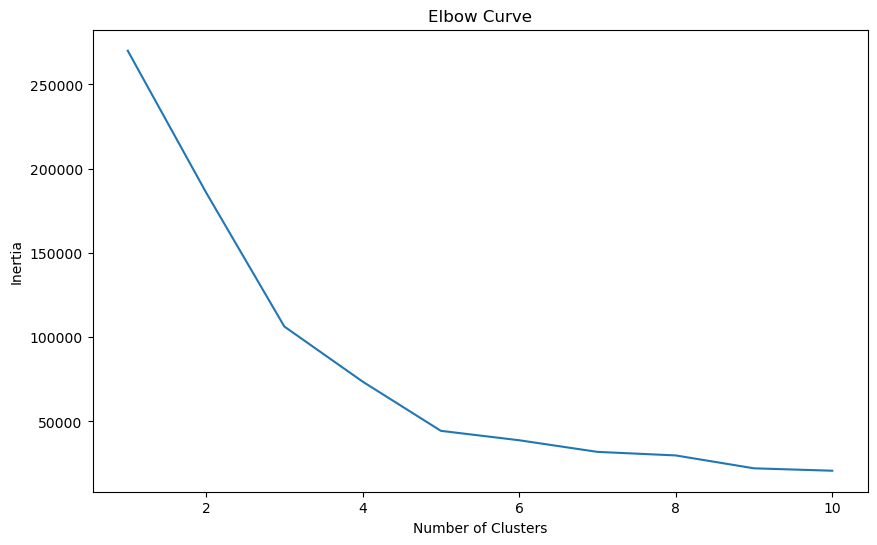

In [273]:
#Finding Optimal number of clusters
wcs_AnnualIncome_spending = []
for k in range(1,11):
    kmeans = KMeans(n_clusters= k,random_state= 0).fit(clustering_Annualincome_Spendingscore)
    wcs_AnnualIncome_spending.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcs_AnnualIncome_spending)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')



#### Clustering on Age,Annual Income and Spending Score

Text(0.5, 1.0, 'Elbow Curve')

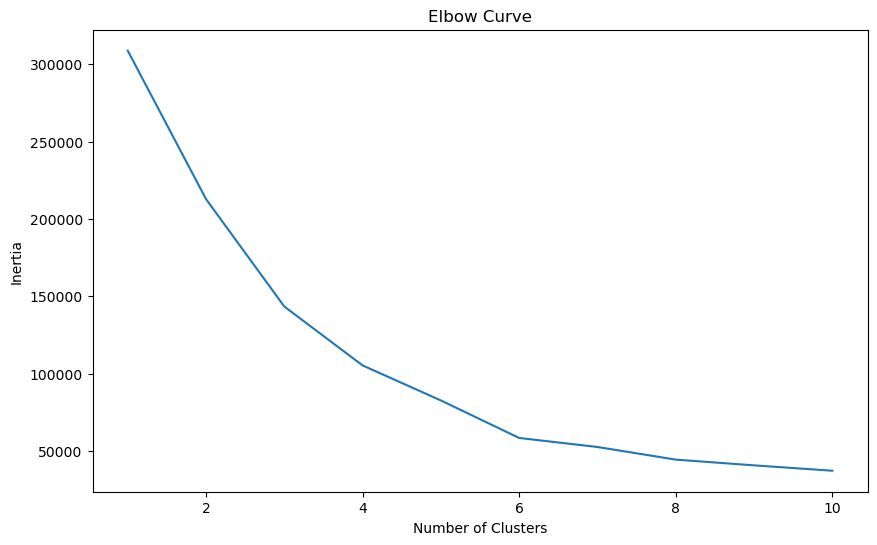

In [275]:
wcs_Age_AnnualIncome_spending = []
for k in range(1,11):
    kmeans = KMeans(n_clusters= k,random_state= 0).fit(clustering_Age_Annualincome_Spendingscore)
    wcs_Age_AnnualIncome_spending.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcs_Age_AnnualIncome_spending)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')

**For Age and Spending Score:**
- The Elbow Method graph suggests that \( k = 4 \) could be a good choice.

**For Annual Income and Spending Score:**
- The Elbow Method graph suggests that \( k = 5 \) could be a good choice.

**For Age, Annual Income, and Spending Score:**
- The Elbow Method graph suggests that \( k = 5 \) could be a good choice.


### Building the K-Means Model and Visualizing the Clusters

#### Clustering on Age and Spending Score

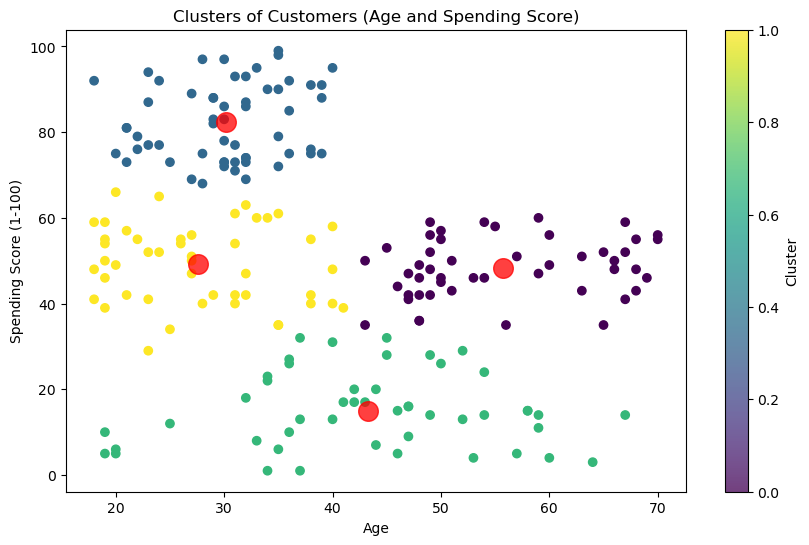

In [331]:
# Build the K-Means model
kmeans_age_spending = KMeans(n_clusters=4, random_state=0)
kmeans_age_spending.fit(clustering_Age_Spendingscore)
df['Cluster_Age_Spending'] = kmeans_age_spending.labels_
centroids = kmeans_age_spending.cluster_centers_


# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster_Age_Spending'], cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='o')  # Centroids
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers (Age and Spending Score)')
plt.colorbar(label='Cluster')
plt.show()


#### Clustering on Annual Income and Spending Score


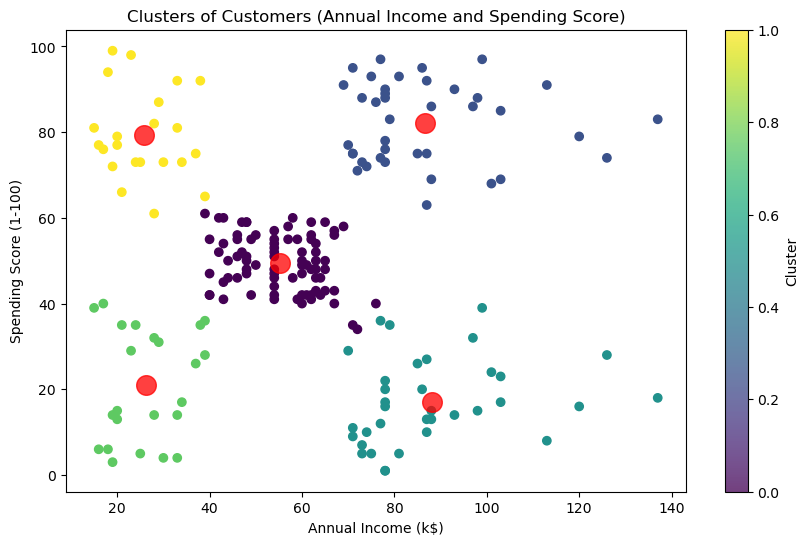

In [333]:
# Build the K-Means model
kmeans_income_spending = KMeans(n_clusters=5, random_state=0)
kmeans_income_spending.fit(clustering_Annualincome_Spendingscore)
df['Cluster_Income_Spending'] = kmeans_income_spending.labels_
centroids = kmeans_income_spending.cluster_centers_


# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster_Income_Spending'], cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='o')  # Centroids
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers (Annual Income and Spending Score)')
plt.colorbar(label='Cluster')
plt.show()


#### Clustering on Age, Annual Income, and Spending Score


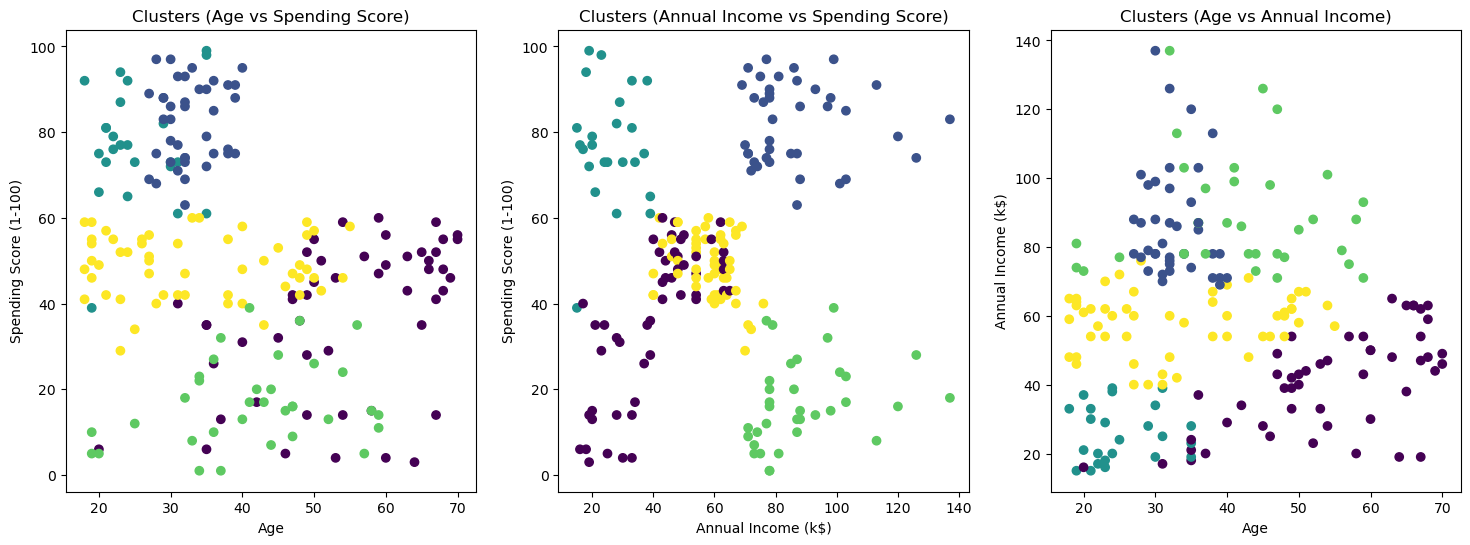

In [337]:
# Build the K-Means model
kmeans_all = KMeans(n_clusters=5, random_state=0)
kmeans_all.fit(clustering_All)
df['Cluster_All_Features'] = kmeans_all.labels_


plt.figure(figsize=(18, 6))

# Age vs Spending Score
plt.subplot(1, 3, 1)
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster_All_Features'], cmap='viridis', marker='o')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters (Age vs Spending Score)')

# Annual Income vs Spending Score
plt.subplot(1, 3, 2)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster_All_Features'], cmap='viridis', marker='o')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters (Annual Income vs Spending Score)')

# Age vs Annual Income
plt.subplot(1, 3, 3)
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster_All_Features'], cmap='viridis', marker='o')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Clusters (Age vs Annual Income)')

plt.show()


### Evaluation

In [342]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(clustering_All, df['Cluster_All_Features'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3771108731967625


### Conclusion

- **Effective Clustering**: The K-means clustering algorithm successfully segmented customers into distinct groups based on their behaviors and attributes.
  
- **Silhouette Score**: Achieved a silhouette score of 0.377, indicating that the clusters are reasonably well-formed, with most points being closer to their own clusters than to others.

- **Cluster Visualization**: Visualizations of the clusters across various feature combinations (Age vs. Spending Score, Annual Income vs. Spending Score, and Age vs. Annual Income) provided clear insights into the distinct characteristics of each cluster.

- **Evaluation Metrics**: The silhouette score provided a good measure of the clustering performance, suggesting that while the clustering is meaningful, there is room for improsed revenue.
